In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd

In [31]:
 import datetime as dt

In [32]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
 engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
database = automap_base()
# reflect the tables
database.prepare(engine, reflect=True)


In [35]:
 # We can view all of the classes that automap found
 database.classes.keys()

[&#39;measurement&#39;, &#39;station&#39;]

In [36]:
# Save references to each table
measurement = database.classes.measurement
station = database.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [38]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Last date is: {last_year[0]}")

# Calculate the date 1 year ago from the last data point in the database
previous_year = (dt.datetime.strptime(last_year[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f"Date from one year ago is: {previous_year}")

Last date is: 2017-08-23
Date from one year ago is: 2016-08-23


In [39]:
# Perform a query to retrieve the data and precipitation scores
measurement_col = (measurement.date, measurement.prcp)

prcp_data = session.query(*measurement_col).\
            filter(measurement.date >= previous_year).all()
prcp_data[:5]


[(&#39;2016-08-23&#39;, 0.0),
 (&#39;2016-08-24&#39;, 0.08),
 (&#39;2016-08-25&#39;, 0.08),
 (&#39;2016-08-26&#39;, 0.0),
 (&#39;2016-08-27&#39;, 0.0)]

In [40]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data,columns=['Date','Precipitation'])
prcp_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [45]:
# Sort the dataframe by date
prcp_df.set_index('Date',inplace=True)
prcp_df = prcp_df.sort_index()
prcp_df = prcp_df.dropna()


In [46]:
prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


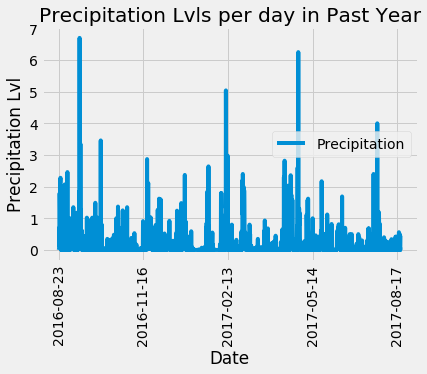

In [48]:
# Use Pandas Plotting with Matplotlib to plot the data
preplot = prcp_df.plot(rot=90);
preplot.set_title("Precipitation Lvls per day in Past Year");
preplot.set_ylabel("Precipitation Lvl");

In [49]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
 prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [51]:
 # Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(station.id)).all()
stations

[(9)]

In [53]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_count =  session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

In [54]:
# List the stations and the counts in descending order.
station_count

[(&#39;USC00519281&#39;, 2772),
 (&#39;USC00519397&#39;, 2724),
 (&#39;USC00513117&#39;, 2709),
 (&#39;USC00519523&#39;, 2669),
 (&#39;USC00516128&#39;, 2612),
 (&#39;USC00514830&#39;, 2202),
 (&#39;USC00511918&#39;, 1979),
 (&#39;USC00517948&#39;, 1372),
 (&#39;USC00518838&#39;, 511)]

In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [59]:
# Choose the station with the highest number of temperature observations.
max_station =  session.query(measurement.date,measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date > previous_year).all()
max_station[:5]

[(&#39;2016-08-24&#39;, 77.0),
 (&#39;2016-08-25&#39;, 80.0),
 (&#39;2016-08-26&#39;, 80.0),
 (&#39;2016-08-27&#39;, 75.0),
 (&#39;2016-08-28&#39;, 73.0)]

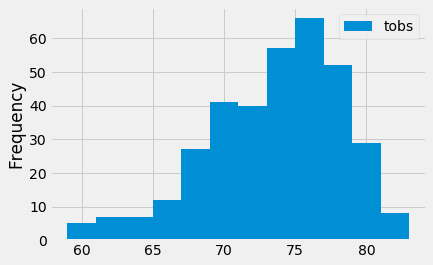

In [62]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_station = pd.DataFrame(max_station)
max_station.plot(kind="hist",bins=12);